In [1]:
from google.colab import drive

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Bootcamp/sp500_companies.csv")
df.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [3]:
import os, math
import numpy as np
import matplotlib.pyplot as plt

print("=== 1) VISTA GENERAL ===")
print("Forma (filas, columnas):", df.shape)
print("\nTipos de datos:")
print(df.dtypes.value_counts())
print("\nMemoria (MB):", round(df.memory_usage(deep=True).sum() / (1024**2), 3))

print("\nPrimeras filas:")
display(df.head())

=== 1) VISTA GENERAL ===
Forma (filas, columnas): (502, 16)

Tipos de datos:
object     10
float64     5
int64       1
Name: count, dtype: int64

Memoria (MB): 1.03

Primeras filas:


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [4]:
# Identificar columnas numéricas y categóricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print("\nColumnas numéricas:", num_cols)
print("Columnas categóricas:", cat_cols)


Columnas numéricas: ['Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'Fulltimeemployees', 'Weight']
Columnas categóricas: ['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry', 'City', 'State', 'Country', 'Longbusinesssummary']


In [5]:
print("\n=== 2) NULOS Y DUPLICADOS ===")
na_count = df.isna().sum().sort_values(ascending=False)
na_pct = (df.isna().mean().sort_values(ascending=False) * 100).round(2)
na_table = pd.DataFrame({"n_nulos": na_count, "%_nulos": na_pct})
display(na_table[na_table["n_nulos"] > 0])


=== 2) NULOS Y DUPLICADOS ===


,n_nulos,%_nulos
Ebitda,29,5.78
State,20,3.98
Fulltimeemployees,9,1.79
Revenuegrowth,3,0.60


In [6]:
#Información de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             502 non-null    object 
 1   Symbol               502 non-null    object 
 2   Shortname            502 non-null    object 
 3   Longname             502 non-null    object 
 4   Sector               502 non-null    object 
 5   Industry             502 non-null    object 
 6   Currentprice         502 non-null    float64
 7   Marketcap            502 non-null    int64  
 8   Ebitda               473 non-null    float64
 9   Revenuegrowth        499 non-null    float64
 10  City                 502 non-null    object 
 11  State                482 non-null    object 
 12  Country              502 non-null    object 
 13  Fulltimeemployees    493 non-null    float64
 14  Longbusinesssummary  502 non-null    object 
 15  Weight               502 non-null    flo

In [7]:
#Estadisticas basicas
df.describe()

,Currentprice,Marketcap,Ebitda,Revenuegrowth,Fulltimeemployees,Weight
count,502.000000,5.020000e+02,4.730000e+02,499.000000,4.930000e+02,502.000000
mean,217.893685,1.107222e+11,7.045286e+09,0.070541,5.782761e+04,0.001992
std,489.205027,3.440074e+11,1.624213e+10,0.180247,1.395988e+05,0.006189
min,9.400000,4.664099e+09,-3.991000e+09,-0.602000,2.800000e+01,0.000084
25%,68.547500,1.933417e+10,1.625000e+09,0.002000,1.020000e+04,0.000348
50%,118.365000,3.706396e+10,2.952748e+09,0.051000,2.169000e+04,0.000667
75%,227.667500,7.830565e+10,6.020000e+09,0.109000,5.510000e+04,0.001409
max,8276.780000,3.846820e+12,1.495470e+11,1.632000,2.100000e+06,0.069209


Se quiere ver las primeras 10 revenuegrowth

In [8]:
# Top 20 por Revenuegrowth
top10 = df.nlargest(20, "Revenuegrowth")
display(top10)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
307,NYQ,SW,Smurfit WestRock plc,Smurfit Westrock Plc,Consumer Cyclical,Packaging & Containers,53.28,27713910784,2.173000e+09,1.632,Dublin,NaN,Ireland,100000.0,"Smurfit Westrock Plc, together with its subsid...",0.000499
384,NMS,SMCI,"Super Micro Computer, Inc.","Super Micro Computer, Inc.",Technology,Computer Hardware,31.59,18497998848,1.304591e+09,1.430,San Jose,CA,United States,NaN,"Super Micro Computer, Inc., together with its ...",0.000333
223,NYQ,PRU,"Prudential Financial, Inc.","Prudential Financial, Inc.",Financial Services,Insurance - Life,117.83,41939349504,5.557334e+09,1.334,Newark,NJ,United States,40366.0,"Prudential Financial, Inc., together with its ...",0.000755
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
96,NMS,MU,"Micron Technology, Inc.","Micron Technology, Inc.",Technology,Semiconductors,90.12,100408999936,8.944000e+09,0.933,Boise,ID,United States,48000.0,"Micron Technology, Inc. designs, develops, man...",0.001806
215,NYQ,NEM,Newmont Corporation,Newmont Corporation,Basic Materials,Gold,38.28,43579867136,6.009000e+09,0.847,Denver,CO,United States,21700.0,Newmont Corporation engages in the production ...,0.000784
341,NMS,CINF,Cincinnati Financial Corporatio,Cincinnati Financial Corporation,Financial Services,Insurance - Property & Casualty,144.57,22598461440,4.062000e+09,0.833,Fairfield,OH,United States,5426.0,"Cincinnati Financial Corporation, together wit...",0.000407
216,NYQ,DFS,Discover Financial Services,Discover Financial Services,Financial Services,Credit Services,173.16,43475628032,NaN,0.605,Riverwoods,IL,United States,21100.0,"Discover Financial Services, through its subsi...",0.000782
37,NYQ,BX,Blackstone Inc.,Blackstone Inc.,Financial Services,Asset Management,170.84,207208415232,NaN,0.541,New York,NY,United States,4735.0,Blackstone Inc. is an alternative asset manage...,0.003728
196,NYQ,VST,Vistra Corp.,Vistra Corp.,Utilities,Utilities - Independent Power Producers,139.95,47614623744,6.020000e+09,0.539,Irving,TX,United States,4870.0,"Vistra Corp., together with its subsidiaries, ...",0.000857


In [9]:
# === Indicadores principales de mercado ===

# 1. Vista general
print("Número de compañías:", df.shape[0])
print("Columnas disponibles:", df.columns.tolist())

# 2. Top 10 por Market Cap
top_marketcap = df.nlargest(10, "Marketcap")[["Symbol","Longname","Sector","Marketcap","Currentprice"]]
print("\n=== Top 10 compañías por Market Cap ===")
display(top_marketcap)

# 3. Top 10 por Revenue Growth
top_revgrowth = df.nlargest(10, "Revenuegrowth")[["Symbol","Longname","Sector","Revenuegrowth","Marketcap"]]
print("\n=== Top 10 compañías por Revenue Growth ===")
display(top_revgrowth)

# 4. Market Cap por sector
sector_marketcap = df.groupby("Sector")["Marketcap"].sum().sort_values(ascending=False)
print("\n=== Market Cap total por sector ===")
display(sector_marketcap)

# 5. Promedio de Revenue Growth por sector
sector_revgrowth = df.groupby("Sector")["Revenuegrowth"].mean().sort_values(ascending=False)
print("\n=== Revenue Growth promedio por sector ===")
display(sector_revgrowth)

# 6. Relación entre Marketcap y Revenuegrowth
corr = df[["Marketcap","Revenuegrowth"]].corr().iloc[0,1]
print("\nCorrelación Market Cap - Revenue Growth:", round(corr,3))

# 7. Indicadores estadísticos generales de variables numéricas
summary_stats = df[["Marketcap","Currentprice","Ebitda","Revenuegrowth","Fulltimeemployees","Weight"]].describe().T
print("\n=== Resumen estadístico ===")
display(summary_stats)

# 8. Identificar sectores con más compañías
sector_counts = df["Sector"].value_counts()
print("\n=== Número de compañías por sector ===")
display(sector_counts)

# 9. Top 10 empleadores (por número de empleados)
top_employers = df.nlargest(10, "Fulltimeemployees")[["Symbol","Longname","Sector","Fulltimeemployees"]]
print("\n=== Top 10 empleadores ===")
display(top_employers)


Número de compañías: 502
Columnas disponibles: ['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry', 'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State', 'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight']

=== Top 10 compañías por Market Cap ===


,Symbol,Longname,Sector,Marketcap,Currentprice
0,AAPL,Apple Inc.,Technology,3846819807232,254.49
1,NVDA,NVIDIA Corporation,Technology,3298803056640,134.70
2,MSFT,Microsoft Corporation,Technology,3246068596736,436.60
3,AMZN,"Amazon.com, Inc.",Consumer Cyclical,2365033807872,224.92
4,GOOGL,Alphabet Inc.,Communication Services,2351625142272,191.41
5,GOOG,Alphabet Inc.,Communication Services,2351623045120,192.96
6,META,"Meta Platforms, Inc.",Communication Services,1477457739776,585.25
7,TSLA,"Tesla, Inc.",Consumer Cyclical,1351627833344,421.06
8,AVGO,Broadcom Inc.,Technology,1031217348608,220.79
9,BRK-B,Berkshire Hathaway Inc.,Financial Services,978776031232,453.20



=== Top 10 compañías por Revenue Growth ===


,Symbol,Longname,Sector,Revenuegrowth,Marketcap
307,SW,Smurfit Westrock Plc,Consumer Cyclical,1.632,27713910784
384,SMCI,"Super Micro Computer, Inc.",Technology,1.430,18497998848
223,PRU,"Prudential Financial, Inc.",Financial Services,1.334,41939349504
1,NVDA,NVIDIA Corporation,Technology,1.224,3298803056640
96,MU,"Micron Technology, Inc.",Technology,0.933,100408999936
215,NEM,Newmont Corporation,Basic Materials,0.847,43579867136
341,CINF,Cincinnati Financial Corporation,Financial Services,0.833,22598461440
216,DFS,Discover Financial Services,Financial Services,0.605,43475628032
37,BX,Blackstone Inc.,Financial Services,0.541,207208415232
196,VST,Vistra Corp.,Utilities,0.539,47614623744



=== Market Cap total por sector ===


,Marketcap
Sector,
Technology,17287013398528
Communication Services,7804046435328
Financial Services,7108162940416
Consumer Cyclical,6372352768000
Healthcare,5190430794752
Industrials,3764601742336
Consumer Defensive,3253838582784
Energy,1598671836672
Utilities,1257369774080



=== Revenue Growth promedio por sector ===


,Revenuegrowth
Sector,
Financial Services,0.122955
Technology,0.115827
Real Estate,0.081267
Healthcare,0.077097
Consumer Cyclical,0.067436
Communication Services,0.052476
Industrials,0.045143
Utilities,0.044156
Basic Materials,0.019409



Correlación Market Cap - Revenue Growth: 0.164

=== Resumen estadístico ===


,count,mean,std,min,25%,50%,75%,max
Marketcap,502.0,1.107222e+11,3.440074e+11,4.664099e+09,1.933417e+10,3.706396e+10,7.830565e+10,3.846820e+12
Currentprice,502.0,2.178937e+02,4.892050e+02,9.400000e+00,6.854750e+01,1.183650e+02,2.276675e+02,8.276780e+03
Ebitda,473.0,7.045286e+09,1.624213e+10,-3.991000e+09,1.625000e+09,2.952748e+09,6.020000e+09,1.495470e+11
Revenuegrowth,499.0,7.054108e-02,1.802470e-01,-6.020000e-01,2.000000e-03,5.100000e-02,1.090000e-01,1.632000e+00
Fulltimeemployees,493.0,5.782761e+04,1.395988e+05,2.800000e+01,1.020000e+04,2.169000e+04,5.510000e+04,2.100000e+06
Weight,502.0,1.992032e-03,6.189128e-03,8.391304e-05,3.478462e-04,6.668275e-04,1.408818e-03,6.920915e-02



=== Número de compañías por sector ===


,count
Sector,
Technology,82
Industrials,70
Financial Services,67
Healthcare,62
Consumer Cyclical,55
Consumer Defensive,37
Utilities,32
Real Estate,31
Communication Services,22



=== Top 10 empleadores ===


,Symbol,Longname,Sector,Fulltimeemployees
10,WMT,Walmart Inc.,Consumer Defensive,2100000.0
3,AMZN,"Amazon.com, Inc.",Consumer Cyclical,1551000.0
32,ACN,Accenture plc,Technology,774000.0
91,UPS,"United Parcel Service, Inc.",Industrials,500000.0
20,HD,"The Home Depot, Inc.",Consumer Cyclical,465000.0
17,UNH,UnitedHealth Group Incorporated,Healthcare,440000.0
163,TGT,Target Corporation,Consumer Defensive,415000.0
207,KR,The Kroger Co.,Consumer Defensive,414000.0
124,MAR,"Marriott International, Inc.",Consumer Cyclical,411000.0
9,BRK-B,Berkshire Hathaway Inc.,Financial Services,396500.0


In [10]:
df2 = pd.read_csv("/content/drive/MyDrive/Bootcamp/sp500_index.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Bootcamp/sp500_stocks.csv")
df2.head()


,Date,S&P500
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57


In [11]:
df3.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,MMM,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-06,MMM,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-07,MMM,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-08,MMM,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
from google.colab import drive
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Bootcamp/sp500_companies.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Bootcamp/sp500_index.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Bootcamp/sp500_stocks.csv")

In [13]:
# ==============================================
# Bloque 0 — Setup (ejecuta este primero)
# ==============================================
# Pensado para Google Colab. Si vas a usar Drive, descomenta el montaje.
# En este entorno, además dejamos rutas locales de ejemplo.

# --- Librerías base
import os, sys, math, textwrap, warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from pathlib import Path
from datetime import datetime, timedelta

# --- Modelado / ML
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit


Dimensión companies: (502, 16)


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309
5,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,192.96,2351623045120,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309
6,NMS,META,"Meta Platforms, Inc.","Meta Platforms, Inc.",Communication Services,Internet Content & Information,585.25,1477457739776,7.920900e+10,0.189,Menlo Park,CA,United States,72404.0,"Meta Platforms, Inc. engages in the developmen...",0.026581
7,NMS,TSLA,"Tesla, Inc.","Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,421.06,1351627833344,1.324400e+10,0.078,Austin,TX,United States,140473.0,"Tesla, Inc. designs, develops, manufactures, l...",0.024317
8,NMS,AVGO,Broadcom Inc.,Broadcom Inc.,Technology,Semiconductors,220.79,1031217348608,2.295800e+10,0.164,Palo Alto,CA,United States,20000.0,"Broadcom Inc. designs, develops, and supplies ...",0.018553
9,NYQ,BRK-B,Berkshire Hathaway Inc. New,Berkshire Hathaway Inc.,Financial Services,Insurance - Diversified,453.20,978776031232,1.495470e+11,-0.002,Omaha,NE,United States,396500.0,"Berkshire Hathaway Inc., through its subsidiar...",0.017609



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             502 non-null    object 
 1   Symbol               502 non-null    object 
 2   Shortname            502 non-null    object 
 3   Longname             502 non-null    object 
 4   Sector               502 non-null    object 
 5   Industry             502 non-null    object 
 6   Currentprice         502 non-null    float64
 7   Marketcap            502 non-null    int64  
 8   Ebitda               473 non-null    float64
 9   Revenuegrowth        499 non-null    float64
 10  City                 502 non-null    object 
 11  State                482 non-null    object 
 12  Country              502 non-null    object 
 13  Fulltimeemployees    493 non-null    float64
 14  Longbusinesssummary  502 non-null    object 
 15  Weight               502 n

,count,mean,std,min,25%,50%,75%,max
Currentprice,502.0,2.178937e+02,4.892050e+02,9.400000e+00,6.854750e+01,1.183650e+02,2.276675e+02,8.276780e+03
Marketcap,502.0,1.107222e+11,3.440074e+11,4.664099e+09,1.933417e+10,3.706396e+10,7.830565e+10,3.846820e+12
Ebitda,473.0,7.045286e+09,1.624213e+10,-3.991000e+09,1.625000e+09,2.952748e+09,6.020000e+09,1.495470e+11
Revenuegrowth,499.0,7.054108e-02,1.802470e-01,-6.020000e-01,2.000000e-03,5.100000e-02,1.090000e-01,1.632000e+00
Fulltimeemployees,493.0,5.782761e+04,1.395988e+05,2.800000e+01,1.020000e+04,2.169000e+04,5.510000e+04,2.100000e+06
Weight,502.0,1.992032e-03,6.189128e-03,8.391304e-05,3.478462e-04,6.668275e-04,1.408818e-03,6.920915e-02



--- Top 10 sectores por número de compañías ---


,count
Sector,
Technology,82
Industrials,70
Financial Services,67
Healthcare,62
Consumer Cyclical,55
Consumer Defensive,37
Utilities,32
Real Estate,31
Communication Services,22


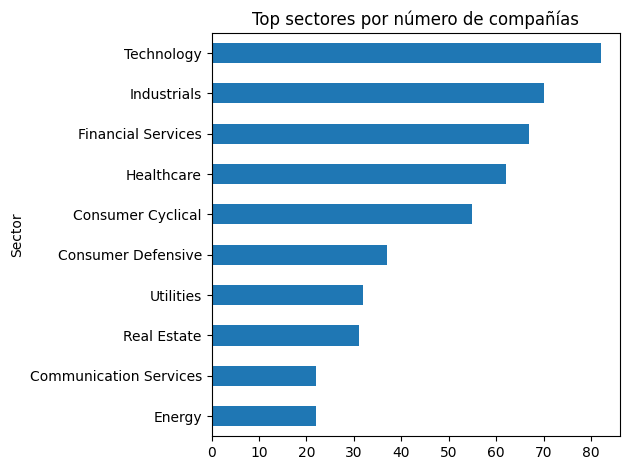

In [14]:
# ==============================================
# Bloque 1 — EDA Companies
# ==============================================
companies = df

print('Dimensión companies:', companies.shape)
display(companies.head(10))

print('\n--- Info ---')
print(companies.info())

print('\n--- Nulos por columna ---')
print(companies.isna().sum().sort_values(ascending=False))

print('\n--- Descriptivos numéricos ---')
display(companies.describe(include='number').T)

print('\n--- Top 10 sectores por número de compañías ---')
if 'Sector' in companies.columns:
    sector_counts = companies['Sector'].value_counts().head(10)
    display(sector_counts)

    # Gráfica simple de distribución de sectores (Top 10)
    plt.figure()
    sector_counts.sort_values(ascending=True).plot(kind='barh', title='Top sectores por número de compañías')
    plt.tight_layout()
    plt.show()

# Limpieza simple de strings (opcional)
for col in companies.select_dtypes(include='object').columns:
    companies[col] = companies[col].astype(str).str.strip()

Dimensión index: (2517, 2)


,Date,Close
0,2014-12-22,2078.54
1,2014-12-23,2082.17
2,2014-12-24,2081.88
3,2014-12-26,2088.77
4,2014-12-29,2090.57


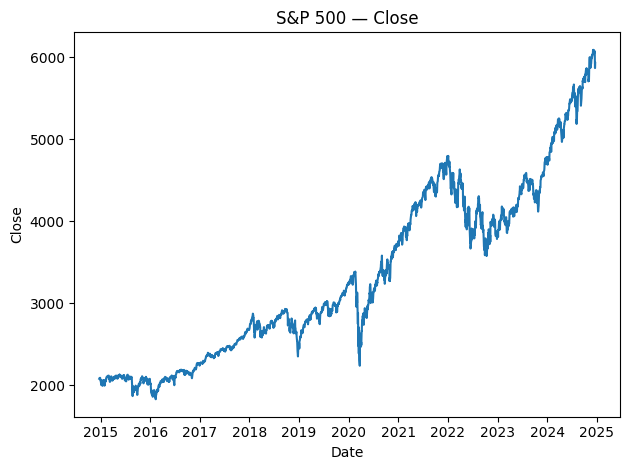


--- Descriptivos de retornos ---


,count,mean,std,min,25%,50%,75%,max
Return,2516.0,0.000480,0.011223,-0.119841,-0.003773,0.000639,0.005748,0.093828
LogReturn,2516.0,0.000417,0.011262,-0.127652,-0.003780,0.000639,0.005731,0.089683


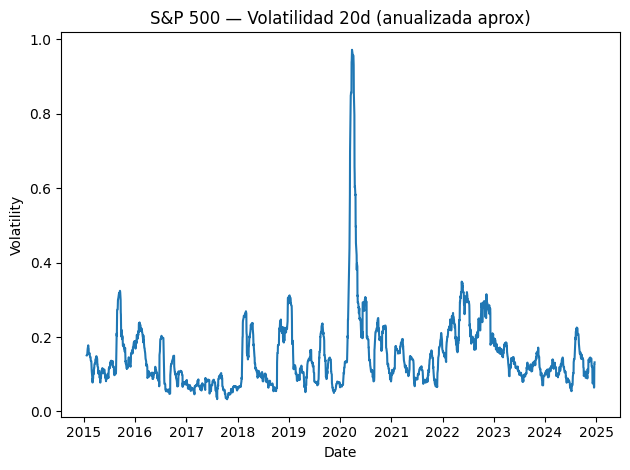

In [15]:
# ==============================================
# Bloque 2 — EDA Index
# ==============================================
index_df = df2

# Estandariza nombres esperados: Date, Close (ajusta si tu archivo usa otros)
# Intento automático de detección de columnas clave
date_col_candidates = [c for c in index_df.columns if c.lower() in ('date','fecha')]
close_col_candidates = [c for c in index_df.columns if c.lower() in ('close','adj close','adj_close','close_price')]

DATE_COL = date_col_candidates[0] if date_col_candidates else index_df.columns[0]
CLOSE_COL = close_col_candidates[0] if close_col_candidates else index_df.columns[1]

index_df[DATE_COL] = pd.to_datetime(index_df[DATE_COL])
index_df = index_df.sort_values(DATE_COL).reset_index(drop=True)
index_df.rename(columns={DATE_COL:'Date', CLOSE_COL:'Close'}, inplace=True)

print('Dimensión index:', index_df.shape)
display(index_df.head())

# Plot del índice
plt.figure()
plt.plot(index_df['Date'], index_df['Close'])
plt.title('S&P 500 — Close')
plt.xlabel('Date'); plt.ylabel('Close')
plt.tight_layout()
plt.show()

# Retornos y volatilidad
index_df['Return'] = index_df['Close'].pct_change()
index_df['LogReturn'] = np.log1p(index_df['Return'])
index_df['Vol_20d'] = index_df['Return'].rolling(20).std() * np.sqrt(252)  # anualizada aprox

print('\n--- Descriptivos de retornos ---')
display(index_df[['Return','LogReturn']].describe().T)

# Volatilidad 20d
plt.figure()
plt.plot(index_df['Date'], index_df['Vol_20d'])
plt.title('S&P 500 — Volatilidad 20d (anualizada aprox)')
plt.xlabel('Date'); plt.ylabel('Volatility')
plt.tight_layout()
plt.show()

Dimensión stocks: (1891536, 7)
  Ticker       Date  Close  High  Low  Open  Volume
0      A 2010-01-04    NaN   NaN  NaN   NaN     NaN
1      A 2010-01-05    NaN   NaN  NaN   NaN     NaN
2      A 2010-01-06    NaN   NaN  NaN   NaN     NaN

Nulos por columna:
Close     1273705
Low       1273705
High      1273705
Open      1273705
Volume    1273705
Date            0
Ticker          0
dtype: int64


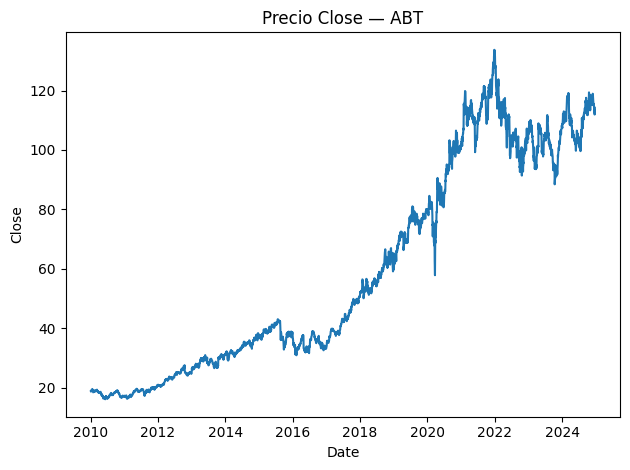

In [16]:
# ==============================================
# Bloque 3 — EDA Stocks (simple, blindado contra 'Close' duplicado)
# ==============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Cargar
stocks = df3

# 2) Quitar columnas duplicadas (nombres idénticos)
stocks = stocks.loc[:, ~stocks.columns.duplicated()].copy()

# 3) Normalizar columnas clave (Ticker, Date, Close, etc.)
colmap = {c.lower(): c for c in stocks.columns}
def pick(*names):
    for n in names:
        if n in colmap:
            return colmap[n]
    return None

ticker_c = pick('ticker','symbol')
date_c   = pick('date','fecha')

# --- Manejo especial de CLOSE: prioriza Adj Close si existe ---
adj_close_c = pick('adj close','adj_close')
plain_close_c = pick('close','close_price')

# Si existen ambas, nos quedamos SOLO con Adj Close (y eliminamos el 'Close' normal)
chosen_close_src = None
if adj_close_c is not None:
    chosen_close_src = adj_close_c
    if plain_close_c is not None and plain_close_c in stocks.columns:
        stocks.drop(columns=[plain_close_c], inplace=True)
elif plain_close_c is not None:
    chosen_close_src = plain_close_c

open_c = pick('open','apertura')
high_c = pick('high','max')
low_c  = pick('low','min')
vol_c  = pick('volume','vol','volumen')

rename = {}
if ticker_c:        rename[ticker_c]        = 'Ticker'
if date_c:          rename[date_c]          = 'Date'
if chosen_close_src:rename[chosen_close_src]= 'Close'
if open_c:          rename[open_c]          = 'Open'
if high_c:          rename[high_c]          = 'High'
if low_c:           rename[low_c]           = 'Low'
if vol_c:           rename[vol_c]           = 'Volume'

stocks = stocks.rename(columns=rename)

# 4) Asegurar tipos, quitar duplicados y consolidar por (Ticker, Date)
if 'Date' in stocks.columns:
    stocks['Date'] = pd.to_datetime(stocks['Date'], errors='coerce')

# Elimina filas duplicadas exactas
stocks = stocks.drop_duplicates().copy()

# Si hay varias filas para el mismo (Ticker, Date), conserva la última
if {'Ticker','Date'}.issubset(stocks.columns):
    stocks = (stocks
              .sort_values(['Ticker','Date'])
              .groupby(['Ticker','Date'], as_index=False)
              .last())

# Tras renombrar, podrían quedar nombres repetidos: limpia de nuevo por si acaso
stocks = stocks.loc[:, ~stocks.columns.duplicated()].copy()

stocks = stocks.sort_values(['Ticker','Date']).reset_index(drop=True)

print('Dimensión stocks:', stocks.shape)
print(stocks.head(3))

print('\nNulos por columna:')
print(stocks.isna().sum().sort_values(ascending=False).head(10))

# 5) Gráfico rápido de un ticker con datos válidos
if {'Ticker','Date','Close'}.issubset(stocks.columns):
    vc = (stocks.dropna(subset=['Close'])
                 .groupby('Ticker')
                 .size()
                 .sort_values(ascending=False))
    if len(vc) > 0:
        tkr = vc.index[0]
        sub = (stocks.loc[(stocks['Ticker']==tkr) & (stocks['Close'].notna()), ['Date','Close']]
                      .sort_values('Date'))
        if not sub.empty:
            plt.figure()
            plt.plot(sub['Date'], sub['Close'])
            plt.title(f'Precio Close — {tkr}')
            plt.xlabel('Date'); plt.ylabel('Close')
            plt.tight_layout()
            plt.show()

# 6) Retornos por ticker
if {'Ticker','Date','Close'}.issubset(stocks.columns):
    stocks['Return'] = stocks.groupby('Ticker')['Close'].pct_change()
else:
    print("\n⚠️ No se encontraron Ticker/Date/Close para calcular retornos.")

> Métricas calculadas para 172 acciones
> Betas calculadas: 172

--- Ranking Top 10 ---
    Ticker     Score   CumReturn    AnnVol  AnnAvgRet  SharpeLike
113   NVDA  6.912342  316.746677  0.454567   0.487989    1.073525
148   TSLA  5.649411  263.374161  0.573582   0.549303    0.957670
14    AXON  2.950835  134.847310  0.491329   0.447225    0.910236
111   NFLX  2.576952  117.985603  0.500160   0.445442    0.890600
46     DPZ  1.640616   59.556414  0.299567   0.319126    1.065290
146    TDG  1.502566   55.295053  0.307640   0.317144    1.030894
70    FTNT  1.192493   52.994447  0.413323   0.352637    0.853174
10    ANET  0.944594   31.817454  0.435965   0.426500    0.978289
102   LRCX  0.820708   37.116302  0.388427   0.319040    0.821365
9     AMZN  0.817401   32.595219  0.327402   0.288638    0.881601

--- Modelo Return(t) con rezagos ---
MAE : 0.0065
RMSE: 0.008398
R2  : -0.071576


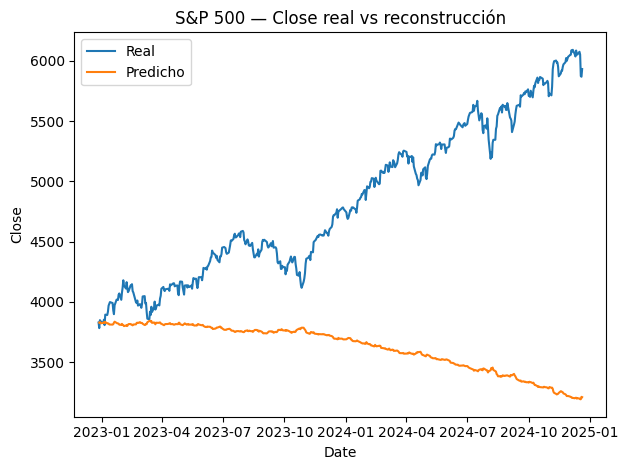

> Resultados exportados en ./outputs


In [17]:
# ==============================================
# Bloque 4 — Analítica combinada y modelado (simplificado, sin squared)
# ==============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 0) Preparar índice (Close, Return)
idx = (index_df[['Date','Close']]
       .rename(columns={'Close':'IndexClose'})
       .sort_values('Date')
       .drop_duplicates(subset=['Date'])
       .reset_index(drop=True))
idx['IndexReturn'] = idx['IndexClose'].pct_change()

# --- 1) Métricas por acción
stock_metrics = []
if {'Ticker','Date','Close','Return'}.issubset(stocks.columns):
    for tkr, g in stocks.groupby('Ticker'):
        g = g.dropna(subset=['Return'])
        if len(g) < 2:
            continue
        cumret = (1 + g['Return']).prod() - 1
        vol = g['Return'].std() * np.sqrt(252)
        avg = g['Return'].mean() * 252
        sharpe_like = avg/vol if pd.notna(vol) and vol != 0 else np.nan
        stock_metrics.append({
            'Ticker': tkr,
            'CumReturn': cumret,
            'AnnVol': vol,
            'AnnAvgRet': avg,
            'SharpeLike': sharpe_like
        })
stock_metrics = pd.DataFrame(stock_metrics).sort_values('CumReturn', ascending=False)
print('> Métricas calculadas para', len(stock_metrics), 'acciones')

# --- 2) Betas vs índice
betas = []
if not idx.empty and {'Ticker','Date','Return'}.issubset(stocks.columns):
    merged = (stocks[['Ticker','Date','Return']]
              .merge(idx[['Date','IndexReturn']], on='Date', how='inner')
              .dropna(subset=['Return','IndexReturn']))
    for tkr, g in merged.groupby('Ticker'):
        if len(g) < 30: continue
        X, y = g[['IndexReturn']].values, g['Return'].values
        lr = LinearRegression().fit(X, y)
        betas.append({'Ticker': tkr, 'Beta': lr.coef_[0], 'Alpha': lr.intercept_})
betas = pd.DataFrame(betas).sort_values('Beta', ascending=False)
print('> Betas calculadas:', len(betas))

# --- 3) Ranking simple
def z(s):
    std = s.std()
    return (s - s.mean()) / (std if std else 1)
if not stock_metrics.empty:
    sm = stock_metrics.copy()
    sm['Score'] = 0.7*z(sm['CumReturn'].fillna(0)) + 0.3*z(sm['SharpeLike'].fillna(0))
    ranking = sm.sort_values('Score', ascending=False)[['Ticker','Score','CumReturn','AnnVol','AnnAvgRet','SharpeLike']]
    print('\n--- Ranking Top 10 ---')
    print(ranking.head(10))
else:
    ranking = pd.DataFrame()

# --- 4) Modelo Return(t) del S&P
dfm = idx[['Date','IndexClose','IndexReturn']].copy()
dfm['Return'] = dfm['IndexReturn']
for lag in [1,2,5,10,20]:
    dfm[f'Close_lag{lag}'] = dfm['IndexClose'].shift(lag)
    dfm[f'Return_lag{lag}'] = dfm['Return'].shift(lag)

feature_cols = [c for c in dfm.columns if 'lag' in c]
model_df = dfm.dropna(subset=feature_cols + ['Return'])
split = int(len(model_df)*0.8)
train, test = model_df.iloc[:split], model_df.iloc[split:]

X_train, y_train = train[feature_cols].values, train['Return'].values
X_test,  y_test  = test[feature_cols].values,  test['Return'].values

reg = Ridge(alpha=1.0)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

mae  = mean_absolute_error(y_test, pred)
# RMSE calculado "a mano"
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2   = r2_score(y_test, pred)

print('\n--- Modelo Return(t) con rezagos ---')
print('MAE :', round(mae, 6))
print('RMSE:', round(rmse, 6))
print('R2  :', round(r2, 6))

# --- Reconstrucción de Close a partir de retornos predichos (ilustrativo)
test_res = test[['Date','IndexClose','Return']].copy()
test_res['PredReturn'] = pred
test_res['PredClose'] = np.nan
if len(test_res) > 1:
    base = test_res['IndexClose'].iloc[0]
    prices = [base]
    for r in test_res['PredReturn'].iloc[1:]:
        prices.append(prices[-1]*(1+r))
    test_res['PredClose'].iloc[1:] = prices[1:]

plt.figure()
plt.plot(test_res['Date'], test_res['IndexClose'], label='Real')
plt.plot(test_res['Date'], test_res['PredClose'], label='Predicho')
plt.title('S&P 500 — Close real vs reconstrucción')
plt.xlabel('Date'); plt.ylabel('Close')
plt.legend(); plt.tight_layout(); plt.show()

# --- 5) Exportar
outdir = Path('outputs'); outdir.mkdir(exist_ok=True)
stock_metrics.to_csv(outdir/'stock_metrics.csv', index=False)
if not ranking.empty: ranking.to_csv(outdir/'ranking_compuesto.csv', index=False)
if not betas.empty: betas.to_csv(outdir/'betas_vs_indice.csv', index=False)
test_res.to_csv(outdir/'predicciones_indice.csv', index=False)
print('> Resultados exportados en ./outputs')

# ***INFORME ANALISIS DE DATOS***

---


In [18]:
# Instalar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar los datos
df = df

# Mostrar información básica del dataset
print("=== INFORMACIÓN BÁSICA DEL DATASET ===")
print(f"Dimensiones del dataset: {df.shape}")
print(f"\nColumnas disponibles: {list(df.columns)}")
print(f"\nTipos de datos:\n{df.dtypes}")
print(f"\nPrimeras 5 filas:")
df.head()

=== INFORMACIÓN BÁSICA DEL DATASET ===
Dimensiones del dataset: (502, 16)

Columnas disponibles: ['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry', 'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State', 'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight']

Tipos de datos:
Exchange                object
Symbol                  object
Shortname               object
Longname                object
Sector                  object
Industry                object
Currentprice           float64
Marketcap                int64
Ebitda                 float64
Revenuegrowth          float64
City                    object
State                   object
Country                 object
Fulltimeemployees      float64
Longbusinesssummary     object
Weight                 float64
dtype: object

Primeras 5 filas:


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [19]:
# Preparación de datos - Filtrar solo empresas del sector industrial
df_industrial = df[df['Sector'] == 'Industrials'].copy()

# Convertir columnas numéricas
numeric_columns = ['Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'Fulltimeemployees', 'Weight']
for col in numeric_columns:
    df_industrial[col] = pd.to_numeric(df_industrial[col], errors='coerce')

print(f"Empresas del sector industrial: {len(df_industrial)}")
print(f"\nIndustrias representadas: {df_industrial['Industry'].unique()}")

Empresas del sector industrial: 70

Industrias representadas: ['Aerospace & Defense' 'Farm & Heavy Construction Machinery'
 'Conglomerates' 'Railroads' 'Specialty Industrial Machinery'
 'Integrated Freight & Logistics' 'Building Products & Equipment'
 'Waste Management' 'Specialty Business Services'
 'Industrial Distribution' 'Engineering & Construction'
 'Rental & Leasing Services' 'Airlines' 'Consulting Services' 'Trucking'
 'Pollution & Treatment Controls' 'Electrical Equipment & Parts'
 'Tools & Accessories' 'Security & Protection Services']


=== BLOQUE 1: ANÁLISIS DESCRIPTIVO ===


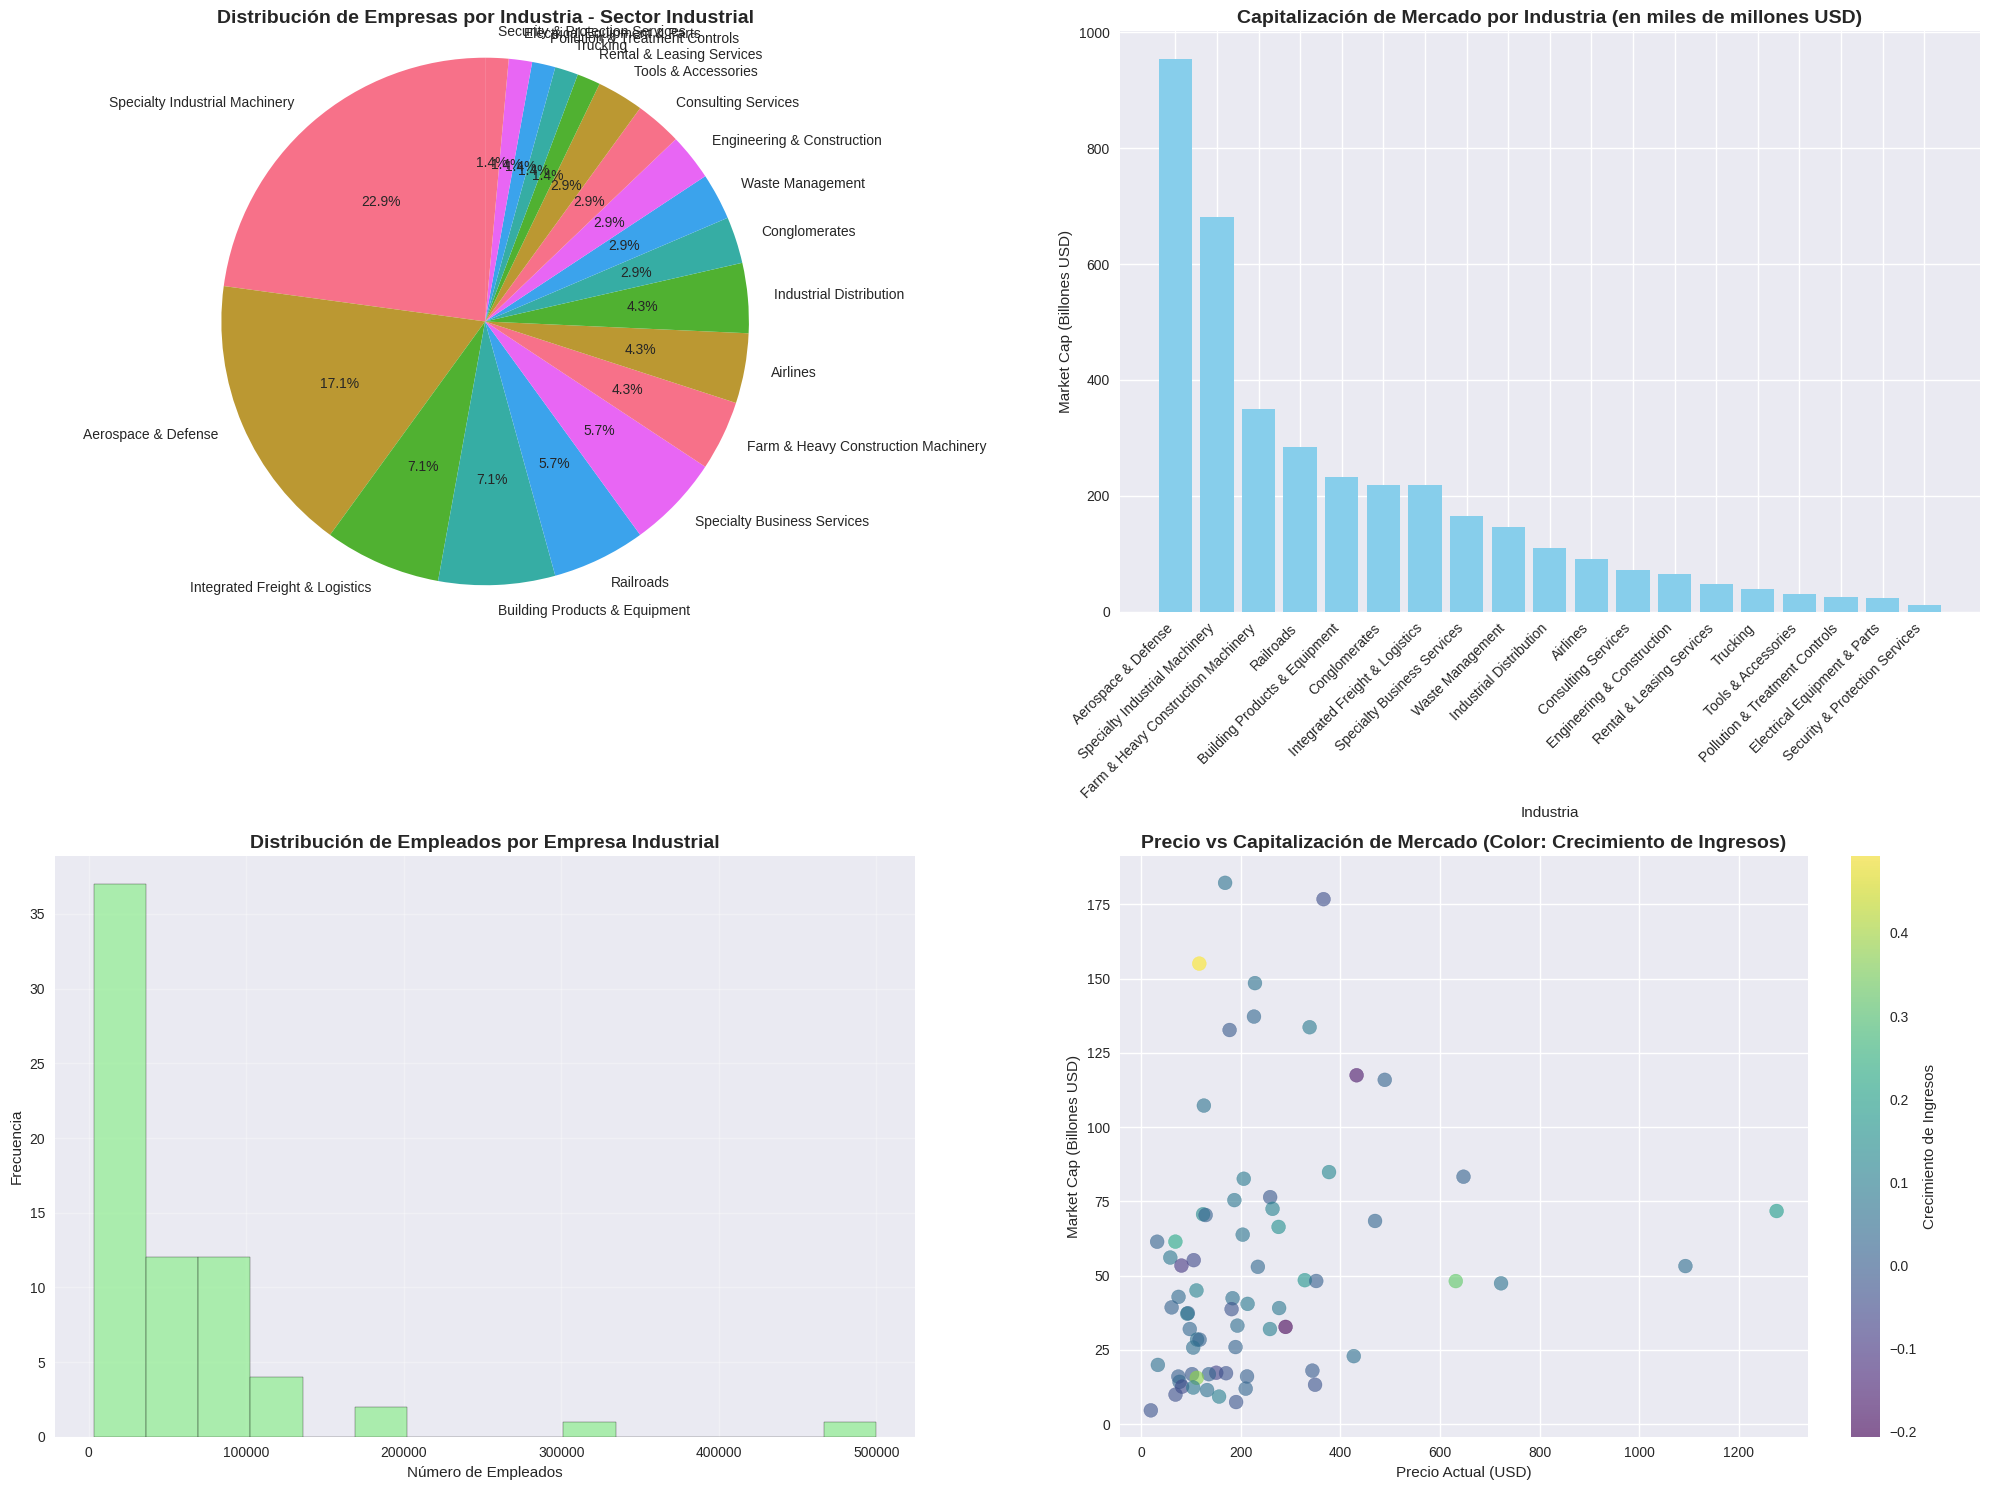


=== ESTADÍSTICAS DESCRIPTIVAS DEL SECTOR INDUSTRIAL ===
       Currentprice     Marketcap        Ebitda  Revenuegrowth  \
count     70.000000  7.000000e+01  7.000000e+01      70.000000   
mean     237.000714  5.378002e+10  3.902160e+09       0.045143   
std      220.438531  4.253117e+10  3.779197e+09       0.101511   
min       19.170000  4.664099e+09 -3.991000e+09      -0.206000   
25%      104.585000  1.851840e+10  1.483500e+09       0.002250   
50%      182.365000  4.263798e+10  2.243759e+09       0.031000   
75%      276.577500  7.060497e+10  5.292789e+09       0.070000   
max     1276.150000  1.822252e+11  1.581900e+10       0.492000   

       Fulltimeemployees     Weight  
count          69.000000  70.000000  
mean        57728.362319   0.000968  
std         73897.103256   0.000765  
min          3330.000000   0.000084  
25%         18000.000000   0.000333  
50%         32400.000000   0.000767  
75%         73463.000000   0.001270  
max        500000.000000   0.003278  


In [20]:
# =============================================
# BLOQUE 1: ANÁLISIS DESCRIPTIVO DEL SECTOR INDUSTRIAL
# =============================================

print("=== BLOQUE 1: ANÁLISIS DESCRIPTIVO ===")

# 1.1 Distribución por industria dentro del sector industrial
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Gráfica 1.1: Distribución por industria
industry_counts = df_industrial['Industry'].value_counts()
axes[0,0].pie(industry_counts.values, labels=industry_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribución de Empresas por Industria - Sector Industrial', fontsize=14, fontweight='bold')
axes[0,0].axis('equal')

# INTERPRETACIÓN: Este gráfico muestra cómo se distribuyen las empresas del sector industrial
# entre las diferentes industrias. Las industrias más representadas son Aerospace & Defense,
# Specialty Industrial Machinery y Industrial Distribution.

# Gráfica 1.2: Capitalización de mercado por industria
industry_marketcap = df_industrial.groupby('Industry')['Marketcap'].sum().sort_values(ascending=False)
axes[0,1].bar(range(len(industry_marketcap)), industry_marketcap.values / 1e9, color='skyblue')
axes[0,1].set_title('Capitalización de Mercado por Industria (en miles de millones USD)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Industria')
axes[0,1].set_ylabel('Market Cap (Billones USD)')
axes[0,1].set_xticks(range(len(industry_marketcap)))
axes[0,1].set_xticklabels(industry_marketcap.index, rotation=45, ha='right')

# INTERPRETACIÓN: Este gráfico revela qué industrias tienen mayor valor de mercado total.
# Aerospace & Defense lidera significativamente, seguida por Specialty Industrial Machinery.

# Gráfica 1.3: Distribución de empleados por empresa
axes[1,0].hist(df_industrial['Fulltimeemployees'].dropna(), bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Distribución de Empleados por Empresa Industrial', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Número de Empleados')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].grid(True, alpha=0.3)

# INTERPRETACIÓN: El histograma muestra la distribución del tamaño de la fuerza laboral.
# La mayoría de las empresas industriales tienen entre 50,000 y 150,000 empleados.

# Gráfica 1.4: Precio actual vs Capitalización de mercado
scatter = axes[1,1].scatter(df_industrial['Currentprice'], df_industrial['Marketcap']/1e9,
                           alpha=0.6, s=100, c=df_industrial['Revenuegrowth'].fillna(0),
                           cmap='viridis')
axes[1,1].set_title('Precio vs Capitalización de Mercado (Color: Crecimiento de Ingresos)',
                   fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Precio Actual (USD)')
axes[1,1].set_ylabel('Market Cap (Billones USD)')
plt.colorbar(scatter, ax=axes[1,1], label='Crecimiento de Ingresos')

# INTERPRETACIÓN: Este scatter plot muestra la relación entre precio de acción y capitalización de mercado.
# Los puntos coloreados por crecimiento de ingresos ayudan a identificar empresas con buen desempeño.

plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print("\n=== ESTADÍSTICAS DESCRIPTIVAS DEL SECTOR INDUSTRIAL ===")
print(df_industrial[numeric_columns].describe())

=== BLOQUE 2: ANÁLISIS DE RENDIMIENTO FINANCIERO ===


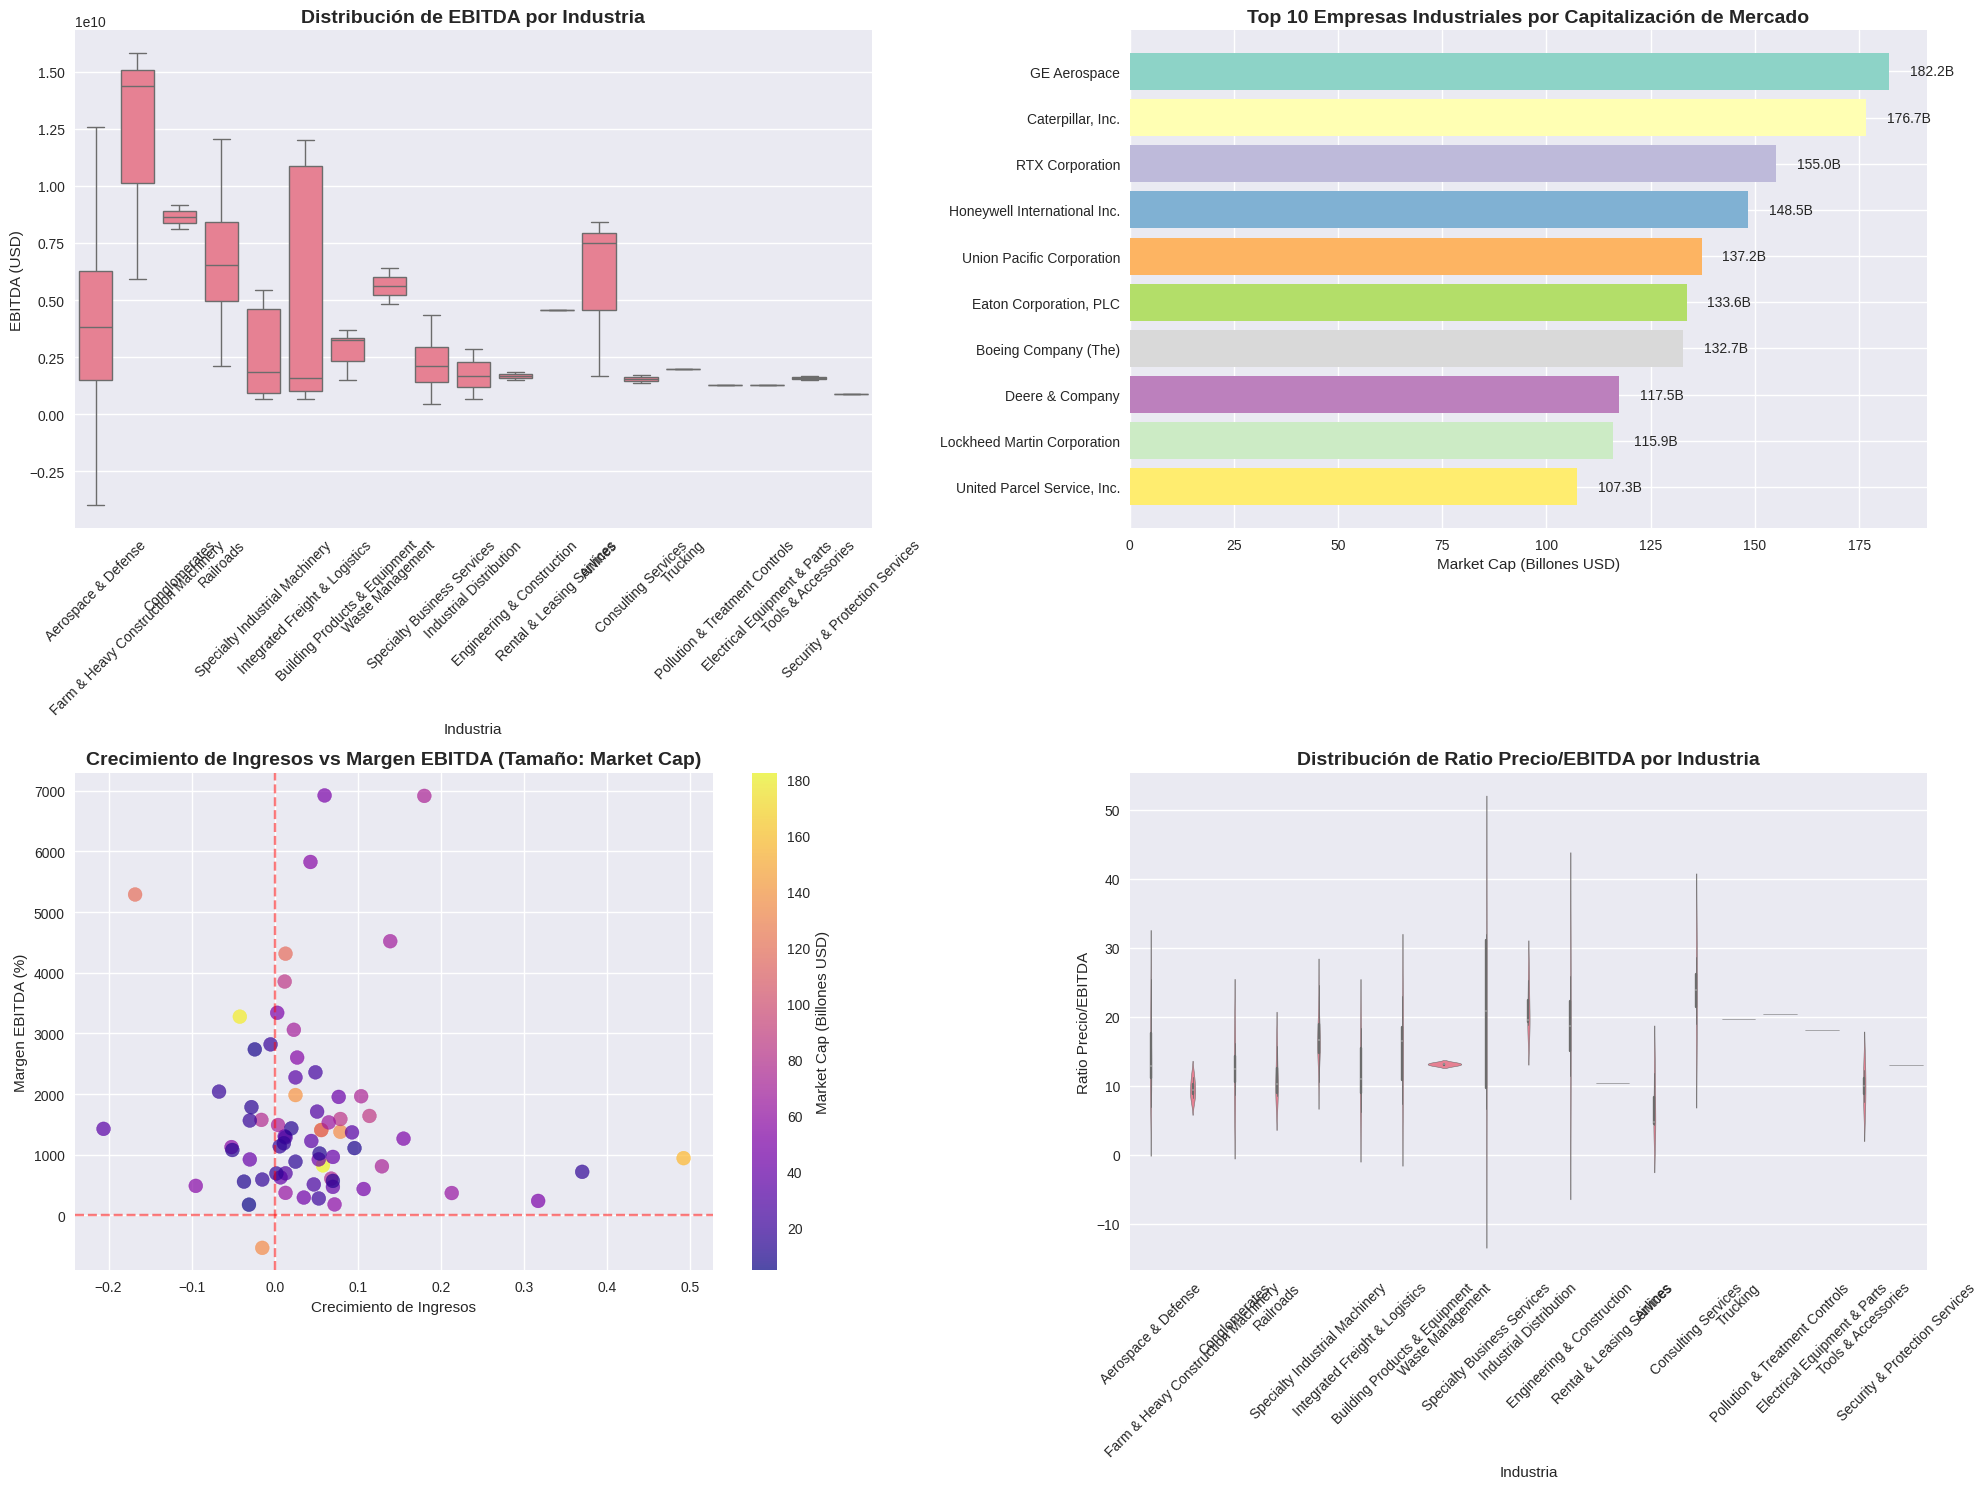


=== MATRIZ DE CORRELACIÓN ===


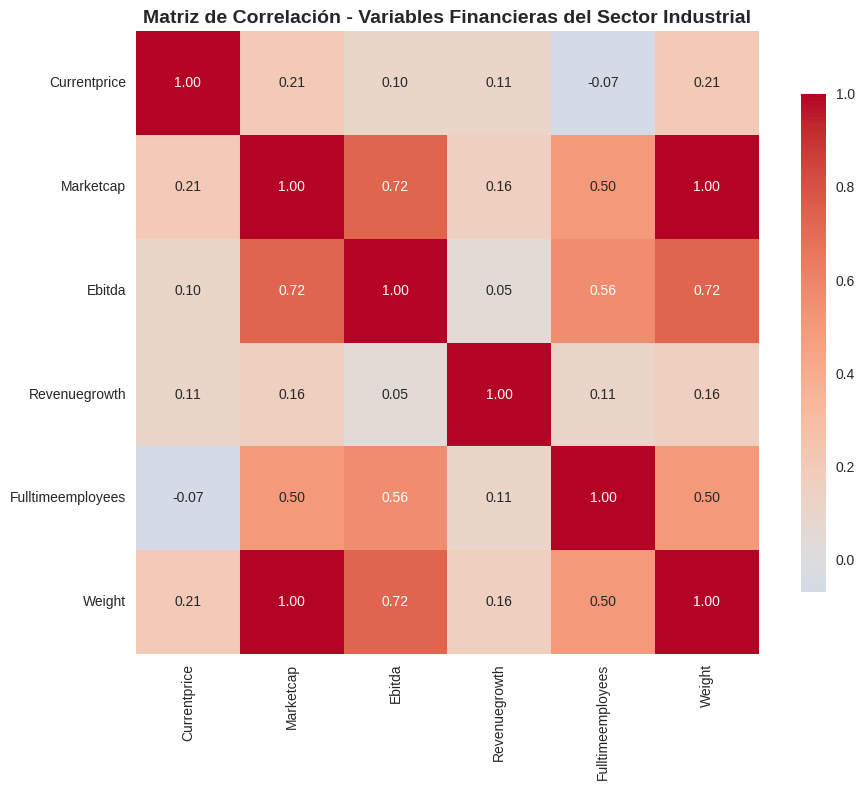

In [21]:
# =============================================
# BLOQUE 2: ANÁLISIS DE RENDIMIENTO FINANCIERO
# =============================================

print("=== BLOQUE 2: ANÁLISIS DE RENDIMIENTO FINANCIERO ===")

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Gráfica 2.1: EBITDA por industria (boxplot)
df_industrial_boxplot = df_industrial.dropna(subset=['Ebitda'])
sns.boxplot(data=df_industrial_boxplot, x='Industry', y='Ebitda', ax=axes[0,0])
axes[0,0].set_title('Distribución de EBITDA por Industria', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Industria')
axes[0,0].set_ylabel('EBITDA (USD)')
axes[0,0].tick_params(axis='x', rotation=45)

# INTERPRETACIÓN: Los boxplots muestran la distribución del EBITDA en cada industria.
# Aerospace & Defense muestra el EBITDA más alto y estable, mientras que otras industrias
# tienen mayor variabilidad.

# Gráfica 2.2: Top 10 empresas por capitalización de mercado
top_10_marketcap = df_industrial.nlargest(10, 'Marketcap')[['Shortname', 'Marketcap', 'Industry']]
bars = axes[0,1].barh(range(len(top_10_marketcap)), top_10_marketcap['Marketcap']/1e9,
                     color=plt.cm.Set3(np.linspace(0, 1, len(top_10_marketcap))))
axes[0,1].set_title('Top 10 Empresas Industriales por Capitalización de Mercado',
                   fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Market Cap (Billones USD)')
axes[0,1].set_yticks(range(len(top_10_marketcap)))
axes[0,1].set_yticklabels(top_10_marketcap['Shortname'])
axes[0,1].invert_yaxis()

# Añadir valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0,1].text(width + 5, bar.get_y() + bar.get_height()/2,
                  f'{width:.1f}B', ha='left', va='center')

# INTERPRETACIÓN: Este gráfico identifica las empresas industriales más valiosas.
# Honeywell, Caterpillar y Union Pacific lideran la lista.

# Gráfica 2.3: Crecimiento de ingresos vs EBITDA Margin
df_industrial['EBITDA_Margin'] = (df_industrial['Ebitda'] / (df_industrial['Marketcap'] / df_industrial['Currentprice'])) * 100
filtered_data = df_industrial.dropna(subset=['Revenuegrowth', 'EBITDA_Margin'])

scatter = axes[1,0].scatter(filtered_data['Revenuegrowth'], filtered_data['EBITDA_Margin'],
                           s=100, c=filtered_data['Marketcap']/1e9, cmap='plasma', alpha=0.7)
axes[1,0].set_title('Crecimiento de Ingresos vs Margen EBITDA (Tamaño: Market Cap)',
                   fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Crecimiento de Ingresos')
axes[1,0].set_ylabel('Margen EBITDA (%)')
axes[1,0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1,0].axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.colorbar(scatter, ax=axes[1,0], label='Market Cap (Billones USD)')

# INTERPRETACIÓN: Este scatter plot analiza la relación entre crecimiento y rentabilidad.
# Las empresas en el cuadrante superior derecho (alto crecimiento, alta rentabilidad) son las más deseables.

# Gráfica 2.4: Relación Precio/EBITDA por industria
df_industrial['P_Ebitda_Ratio'] = df_industrial['Marketcap'] / df_industrial['Ebitda']
valid_ratio_data = df_industrial[df_industrial['P_Ebitda_Ratio'].between(0, 50)]  # Filtrar outliers

sns.violinplot(data=valid_ratio_data, x='Industry', y='P_Ebitda_Ratio', ax=axes[1,1])
axes[1,1].set_title('Distribución de Ratio Precio/EBITDA por Industria', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Industria')
axes[1,1].set_ylabel('Ratio Precio/EBITDA')
axes[1,1].tick_params(axis='x', rotation=45)

# INTERPRETACIÓN: Los violin plots muestran la distribución del ratio Precio/EBITDA.
# Ratios más bajos pueden indicar subvaloración, mientras que ratios más altos pueden sugerir sobrevaloración.

plt.tight_layout()
plt.show()

# Análisis de correlación
print("\n=== MATRIZ DE CORRELACIÓN ===")
correlation_matrix = df_industrial[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': .8})
plt.title('Matriz de Correlación - Variables Financieras del Sector Industrial',
         fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [22]:
# =============================================
# BLOQUE 3: ANÁLISIS GEOGRÁFICO Y COMPARATIVO
# =============================================

print("=== BLOQUE 3: ANÁLISIS GEOGRÁFICO Y COMPARATIVO ===")

# Gráfico interactivo con Plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Distribución Geográfica por Estado',
                   'Market Cap vs Empleados por Industria',
                   'Crecimiento por Estado',
                   'Top Empresas por Múltiples Métricas'),
    specs=[[{"type": "choropleth"}, {"type": "scatter"}],
           [{"type": "bar"}, {"type": "bar"}]],
    vertical_spacing=0.12,
    horizontal_spacing=0.08
)

# Gráfica 3.1: Mapa de distribución geográfica
state_counts = df_industrial['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

fig.add_trace(
    go.Choropleth(
        locations=state_counts['State'],
        z=state_counts['Count'],
        locationmode='USA-states',
        colorscale='Blues',
        colorbar_title="Número de Empresas",
        showscale=True
    ),
    row=1, col=1
)

fig.update_geos(scope='usa', row=1, col=1)

# INTERPRETACIÓN: El mapa muestra la concentración geográfica de empresas industriales.
# Estados como Texas, Illinois y Ohio tienen alta concentración de empresas industriales.

# Gráfica 3.2: Market Cap vs Empleados (burbujas)
for industry in df_industrial['Industry'].unique():
    industry_data = df_industrial[df_industrial['Industry'] == industry]
    fig.add_trace(
        go.Scatter(
            x=industry_data['Fulltimeemployees'],
            y=industry_data['Marketcap']/1e9,
            mode='markers',
            name=industry,
            text=industry_data['Shortname'],
            hovertemplate='<b>%{text}</b><br>Empleados: %{x:,}<br>Market Cap: $%{y:.1f}B<br>Industria: ' + industry,
            marker=dict(size=12, line=dict(width=1, color='DarkSlateGrey'))
        ),
        row=1, col=2
    )

fig.update_xaxes(title_text="Número de Empleados", row=1, col=2)
fig.update_yaxes(title_text="Market Cap (Billones USD)", row=1, col=2)

# INTERPRETACIÓN: Este scatter plot muestra la relación entre tamaño de empresa (empleados)
# y valor de mercado. Empresas con muchos empleados pero bajo market cap pueden ser menos eficientes.

# Gráfica 3.3: Crecimiento promedio por estado
state_growth = df_industrial.groupby('State')['Revenuegrowth'].mean().sort_values(ascending=False)
top_states = state_growth.head(10)

fig.add_trace(
    go.Bar(
        x=top_states.index,
        y=top_states.values,
        marker_color='lightcoral',
        hovertemplate='Estado: %{x}<br>Crecimiento Promedio: %{y:.3f}<extra></extra>'
    ),
    row=2, col=1
)

fig.update_xaxes(title_text="Estado", row=2, col=1)
fig.update_yaxes(title_text="Crecimiento de Ingresos Promedio", row=2, col=1)

# INTERPRETACIÓN: Esta gráfica identifica los estados con mayor crecimiento promedio de ingresos.
# Esto puede indicar clusters industriales en crecimiento.

# Gráfica 3.4: Top empresas por múltiples métricas
metrics_comparison = df_industrial.nlargest(8, 'Marketcap')[['Shortname', 'Marketcap', 'Revenuegrowth', 'Ebitda']].melt(
    id_vars=['Shortname'], var_name='Metric', value_name='Value'
)

# Normalizar valores para comparación
metrics_comparison['Value_Normalized'] = metrics_comparison.groupby('Metric')['Value'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

fig.add_trace(
    go.Bar(
        x=[f"{row['Shortname']}-{row['Metric']}" for _, row in metrics_comparison.iterrows()],
        y=metrics_comparison['Value_Normalized'],
        marker_color=px.colors.qualitative.Set3,
        hovertemplate='Empresa: %{x}<br>Valor Normalizado: %{y:.3f}<extra></extra>'
    ),
    row=2, col=2
)

fig.update_xaxes(title_text="Empresa - Métrica", tickangle=45, row=2, col=2)
fig.update_yaxes(title_text="Valor Normalizado (0-1)", row=2, col=2)

# INTERPRETACIÓN: Este gráfico compara las principales empresas en múltiples métricas normalizadas.
# Permite identificar empresas que sobresalen en diferentes aspectos.

fig.update_layout(
    height=800,
    title_text="Análisis Geográfico y Comparativo del Sector Industrial",
    showlegend=True,
    template="plotly_white"
)

fig.show()

# Resumen ejecutivo
print("\n=== RESUMEN EJECUTIVO DEL SECTOR INDUSTRIAL ===")
print(f"• Total de empresas analizadas: {len(df_industrial)}")
print(f"• Industrias representadas: {len(df_industrial['Industry'].unique())}")
print(f"• Capitalización de mercado total: ${df_industrial['Marketcap'].sum()/1e12:.2f} trillones")
print(f"• Empleados totales: {df_industrial['Fulltimeemployees'].sum():,}")
print(f"• Crecimiento de ingresos promedio: {df_industrial['Revenuegrowth'].mean():.2%}")
print(f"• Estados con más empresas: {', '.join(state_counts.head(3)['State'].tolist())}")

=== BLOQUE 3: ANÁLISIS GEOGRÁFICO Y COMPARATIVO ===



=== RESUMEN EJECUTIVO DEL SECTOR INDUSTRIAL ===
• Total de empresas analizadas: 70
• Industrias representadas: 19
• Capitalización de mercado total: $3.76 trillones
• Empleados totales: 3,983,257.0
• Crecimiento de ingresos promedio: 4.51%
• Estados con más empresas: TX, VA, IL


In [23]:
# Análisis adicional: Tabla resumen de las principales empresas industriales
print("=== TABLA RESUMEN - PRINCIPALES EMPRESAS INDUSTRIALES ===")

summary_table = df_industrial.nlargest(15, 'Marketcap')[[
    'Shortname', 'Industry', 'Currentprice', 'Marketcap', 'Revenuegrowth', 'Fulltimeemployees', 'City', 'State'
]].copy()

summary_table['Marketcap_Billions'] = summary_table['Marketcap'] / 1e9
summary_table['Revenuegrowth_pct'] = summary_table['Revenuegrowth'] * 100

# Formatear la tabla para mejor visualización
display_table = summary_table[[
    'Shortname', 'Industry', 'Currentprice', 'Marketcap_Billions',
    'Revenuegrowth_pct', 'Fulltimeemployees', 'City', 'State'
]].round(2)

display_table.columns = ['Empresa', 'Industria', 'Precio (USD)', 'Market Cap (B)',
                       'Crecimiento (%)', 'Empleados', 'Ciudad', 'Estado']

print(display_table.to_string(index=False))

=== TABLA RESUMEN - PRINCIPALES EMPRESAS INDUSTRIALES ===
                     Empresa                           Industria  Precio (USD)  Market Cap (B)  Crecimiento (%)  Empleados     Ciudad Estado
                GE Aerospace                 Aerospace & Defense        168.37          182.23              5.8   125000.0   Evendale     OH
           Caterpillar, Inc. Farm & Heavy Construction Machinery        366.04          176.72             -4.2   113200.0     Irving     TX
             RTX Corporation                 Aerospace & Defense        116.48          155.04             49.2   185000.0  Arlington     VA
Honeywell International Inc.                       Conglomerates        228.32          148.46              5.6    95000.0  Charlotte     NC
   Union Pacific Corporation                           Railroads        226.32          137.21              2.5    30518.0      Omaha     NE
      Eaton Corporation, PLC      Specialty Industrial Machinery        338.12          133.63  